Exploratory data analysis

In [1]:
import pandas as pd
df=pd.read_csv("house_perchase.csv")

In [2]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

here we try to clean the data by removing the very worset null values containing columns

In [4]:
df.drop(["Alley","PoolQC","MiscFeature","Fence","FireplaceQu"],axis=1,inplace=True)

feature selection 

In [5]:
df=df.loc[:,["MSSubClass","MSZoning",'LotFrontage','LotArea','Street',"LandContour",'Utilities','LotConfig',
            'Neighborhood', 'Condition1', 'Condition2','BldgType','HouseStyle','OverallQual', 'OverallCond',
            'RoofStyle','YearBuilt', 'YearRemodAdd','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType', 'MasVnrArea',
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','TotalBsmtSF',
            'Heating', 'HeatingQC','Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 
             'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars', 'GarageArea', 
             'GarageQual', 'GarageCond','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 
            'MiscVal', 'MoSold', 'YrSold','SaleCondition', 'SalePrice']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofMatl

In [7]:
import numpy as np
all_mode=df.mode(numeric_only=False)
all_mode # all mode values are given

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,20,RL,60.0,7200,Pave,Lvl,AllPub,Inside,NAmes,Norm,...,0,0,0,0,0,0,6,2009,Normal,140000


here we are doing filling all NAN catagorical object columns with there mode valuse 

In [8]:
df["MasVnrType"].fillna(value=all_mode["MasVnrType"].values[0],inplace=True)
df["BsmtQual"].fillna(value=all_mode["BsmtQual"].values[0],inplace=True)
df["BsmtCond"].fillna(value=all_mode["BsmtCond"].values[0],inplace=True)
df["Electrical"].fillna(value=all_mode["Electrical"].values[0],inplace=True)
df["GarageType"].fillna(value=all_mode["GarageType"].values[0],inplace=True)
df["GarageFinish"].fillna(value=all_mode["GarageFinish"].values[0],inplace=True)
df["GarageQual"].fillna(value=all_mode["GarageQual"].values[0],inplace=True)
df["GarageCond"].fillna(value=all_mode["GarageCond"].values[0],inplace=True)
df["BsmtExposure"].fillna(value=all_mode["BsmtExposure"].values[0],inplace=True)

In [9]:
df.describe()# from here we can easily detect which columns have outleirs so on that basis we will replace that numerical valued containg columns with there median values

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


from here we can easily detect which columns have outleirs so on that basis we will replace that numerical valued containg columns with there median values.
And where we donot get outlier we will replace that with mean values

In [10]:
df["LotFrontage"].fillna(value=df["LotFrontage"].median(),inplace=True)
df["MasVnrArea"].fillna(value=df["MasVnrArea"].median(),inplace=True)
df["GarageYrBlt"].fillna(value=df["GarageYrBlt"].mean(),inplace=True)# as we know that in year formation there will no outlair because it outter limit is 2020.

we will now remove outleire

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


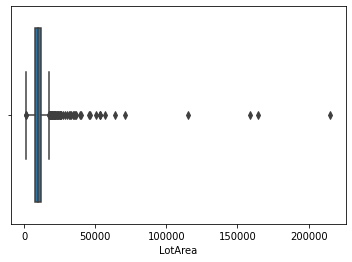

In [11]:
import seaborn as sea
import numpy as np
sea.boxplot(df['LotArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


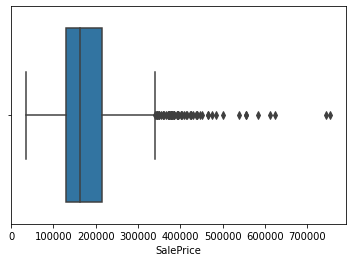

In [12]:
sea.boxplot(df["SalePrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


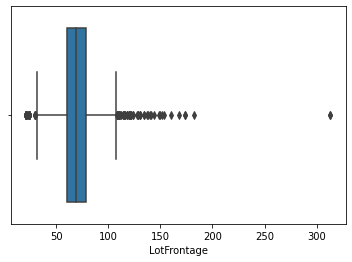

In [13]:
sea.boxplot(df["LotFrontage"])

In [14]:
df=df[(df.LotArea<50000)&(df.LotFrontage<150)&(df.SalePrice<455000)]
df.shape

(1430, 65)

In [15]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,57.118881,68.824476,9766.344755,6.060839,5.579720,1971.041259,1984.657343,98.860140,1041.513287,1147.980420,...,92.314685,45.760839,21.852448,3.481119,14.690210,1.734965,43.562238,6.326573,2007.819580,176565.218881
std,42.437785,18.803186,4451.486213,1.345159,1.114951,30.182957,20.667214,170.827763,403.876476,363.122609,...,122.065838,65.671757,59.875003,29.619266,54.730613,33.055084,500.820216,2.697806,1.325703,69603.214393
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,794.000000,877.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,50.000000,69.000000,9375.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,984.500000,1079.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161250.000000
75%,70.000000,78.000000,11412.750000,7.000000,6.000000,2000.000000,2004.000000,160.000000,1271.750000,1370.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,210000.000000
max,190.000000,149.000000,46589.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,3206.000000,3228.000000,...,736.000000,547.000000,386.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,451950.000000


now we do encodinging to all catagorical values contaning columns to integer values

In [16]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df["MSZoning_E"]=lb.fit_transform(df["MSZoning"])
df["Street_E"]=lb.fit_transform(df["Street"])
df["LandContour_E"]=lb.fit_transform(df["LandContour"])
df["Utilities_E"]=lb.fit_transform(df["Utilities"])
df["LotConfig_E"]=lb.fit_transform(df["LotConfig"])
df["Neighborhood_E"]=lb.fit_transform(df["Neighborhood"])
df["Condition1_E"]=lb.fit_transform(df["Condition1"])
df["Condition2_E"]=lb.fit_transform(df["Condition2"])
df["BldgType_E"]=lb.fit_transform(df["BldgType"])
df["HouseStyle_E"]=lb.fit_transform(df["HouseStyle"])
df["RoofStyle_E"]=lb.fit_transform(df["RoofStyle"])
df["RoofMatl_E"]=lb.fit_transform(df["RoofMatl"])
df["Exterior1st_E"]=lb.fit_transform(df["Exterior1st"])
df["Exterior2nd_E"]=lb.fit_transform(df["Exterior2nd"])
df["MasVnrType_E"]=lb.fit_transform(df["MasVnrType"])
df["ExterQual_E"]=lb.fit_transform(df["ExterQual"])
df["ExterCond_E"]=lb.fit_transform(df["ExterCond"])
df["Foundation_E"]=lb.fit_transform(df["Foundation"])
df["BsmtQual_E"]=lb.fit_transform(df["BsmtQual"])
df["BsmtCond_E"]=lb.fit_transform(df["BsmtCond"])
df["BsmtExposure_E"]=lb.fit_transform(df["BsmtExposure"])
df["Heating_E"]=lb.fit_transform(df["Heating"])
df["HeatingQC_E"]=lb.fit_transform(df["HeatingQC"])
df["Electrical_E"]=lb.fit_transform(df["Electrical"])
df["KitchenQual_E"]=lb.fit_transform(df["KitchenQual"])
df["Functional_E"]=lb.fit_transform(df["Functional"])
df["GarageType_E"]=lb.fit_transform(df["GarageType"])
df["Functional_E"]=lb.fit_transform(df["Functional"])
df["GarageFinish_E"]=lb.fit_transform(df["GarageFinish"])
df["GarageQual_E"]=lb.fit_transform(df["GarageQual"])
df["GarageCond_E"]=lb.fit_transform(df["GarageCond"])
df["SaleCondition_E"]=lb.fit_transform(df["SaleCondition"])

here we try to get correlation plot by seaborn heatmap plot

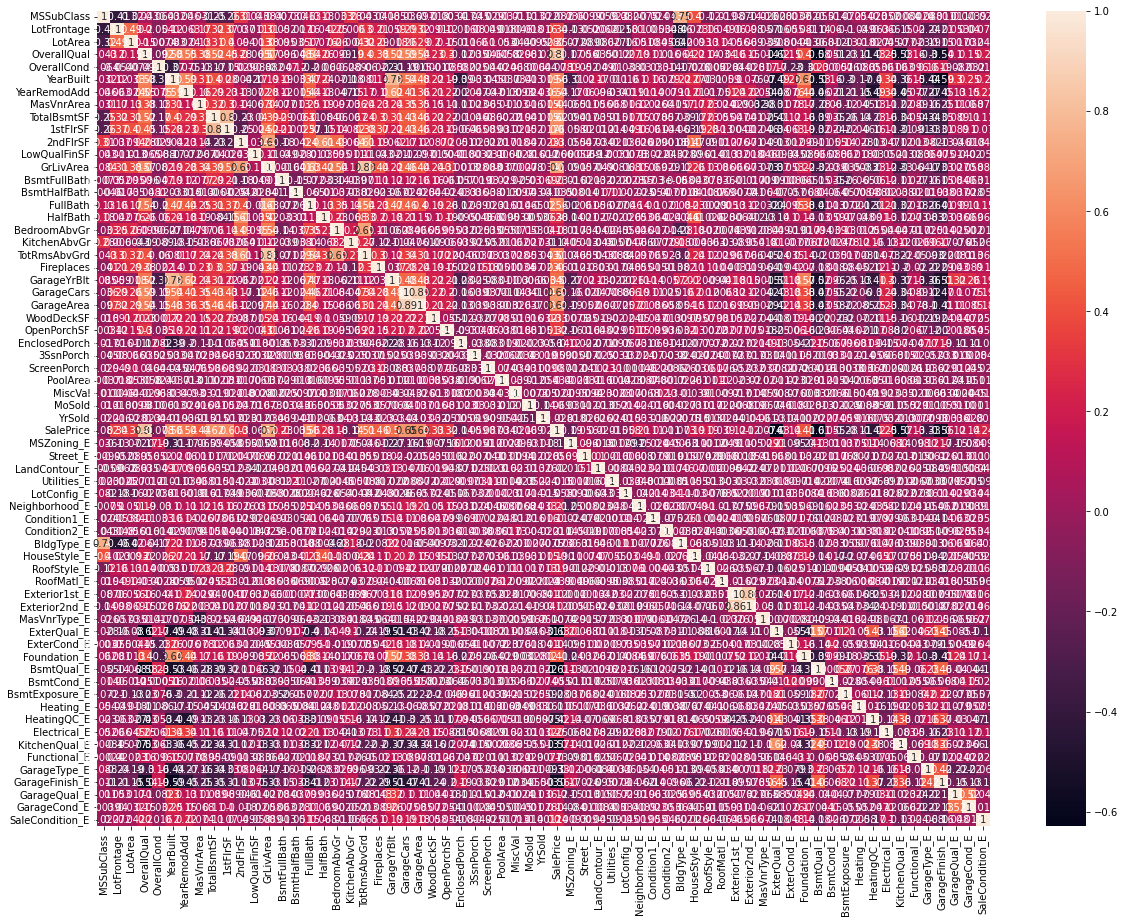

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sea.heatmap(df.corr(),annot=True)

so it reflect  that  our independent variable are linearly related to each other

now we divide the data as train and test

In [18]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice', 'MSZon

In [19]:
X=df[['MSZoning_E', 'Street_E', 'LandContour_E','Utilities_E', 'LotConfig_E', 'Neighborhood_E', 'Condition1_E',
       'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E','RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E',
       'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E','BsmtCond_E', 'BsmtExposure_E', 'Heating_E', 'HeatingQC_E',
       'Electrical_E', 'KitchenQual_E', 'Functional_E', 'GarageType_E','GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
      'SaleCondition_E','MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd',
     'MasVnrArea',"TotalBsmtSF",'2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
      'HalfBath','BedroomAbvGr', 'KitchenAbvGr','1stFlrSF',"TotRmsAbvGrd","Fireplaces","GarageYrBlt",'GarageCars', 'GarageArea',
     'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']].values
Y=df[['SalePrice']].values

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

here we are apply model of Ridge regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
alpha_values=[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,50]
for i in alpha_values:
    ridg=Ridge(alpha=i)
    ridg.fit(X_train,Y_train)
    Y_predicted=ridg.predict(X_test)
    print("one this alphe value--",i,"--R2_score-----",round(r2_score(Y_test,Y_predicted),3))
    print("one this alphe value--",i,"--negative Mean squart absolute error---------:%0.3f"%(-np.sqrt(mean_squared_error(Y_test,Y_predicted))))

one this alphe value-- 1e-15 --R2_score----- 0.8
one this alphe value-- 1e-15 --negative Mean squart absolute error---------:-32111.163
one this alphe value-- 1e-10 --R2_score----- 0.8
one this alphe value-- 1e-10 --negative Mean squart absolute error---------:-32111.163
one this alphe value-- 1e-08 --R2_score----- 0.8
one this alphe value-- 1e-08 --negative Mean squart absolute error---------:-32111.163
one this alphe value-- 0.0001 --R2_score----- 0.8
one this alphe value-- 0.0001 --negative Mean squart absolute error---------:-32111.166
one this alphe value-- 0.001 --R2_score----- 0.8
one this alphe value-- 0.001 --negative Mean squart absolute error---------:-32111.194
one this alphe value-- 0.01 --R2_score----- 0.8
one this alphe value-- 0.01 --negative Mean squart absolute error---------:-32111.469
one this alphe value-- 1 --R2_score----- 0.8
one this alphe value-- 1 --negative Mean squart absolute error---------:-32135.442
one this alphe value-- 5 --R2_score----- 0.8
one this al

we got that actually for regression problem accuracy_score not working for checking accuracy for that we need to use r2_score those model which predict exact value there r2_score is 1.and if they predict very worest value than r2-SCORE FOR THAT IS IN NEGATIVE

so we get that almost all are getting same r_2score and it is approximately equal to 0.90  which reflect that we got good accuracy  means our model can will emplimented this with our profectional people for predicting tha value of house


so root mean squared  error is very less at alpha=50 along with it have good r_score value so optimal value of alpha is ==50 because any number of time you execute the code but root mean squard error for this alwaysless in compare to other

In [22]:
from sklearn.model_selection import GridSearchCV
alpha_values={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,50]}
ridg=Ridge()
ridge=GridSearchCV(ridg,alpha_values,scoring='neg_mean_squared_error',cv=5)#here cv=cross validation
ridge.fit(X,Y)
print("\n output------")
print(ridge.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.24078e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.96567e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.63057e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.96615e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit


 output------
{'alpha': 50}


here we get same alpha as we expect previously most optimal alpha for Redge regression model is 50.

here we are apply model of Lasso regression

In [23]:
from sklearn.linear_model import Lasso
alpha_values=[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,50]
for i in alpha_values:
    lass=Lasso(alpha=i)
    lass.fit(X_train,Y_train)
    Y_predicted=lass.predict(X_test)
    print("one this alphe value--",i,"--R2_score-----",round(r2_score(Y_test,Y_predicted),3))
    print("one this alphe value--",i,"--negative root Mean squart absolute error---------:%0.3f"%(-np.sqrt(mean_squared_error(Y_test,Y_predicted))))

one this alphe value-- 1e-15 --R2_score----- 0.8
one this alphe value-- 1e-15 --negative root Mean squart absolute error---------:-32111.163


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.728e+11, tolerance: 5.448e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+11, tolerance: 5.448e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


one this alphe value-- 1e-10 --R2_score----- 0.8
one this alphe value-- 1e-10 --negative root Mean squart absolute error---------:-32111.163
one this alphe value-- 1e-08 --R2_score----- 0.8
one this alphe value-- 1e-08 --negative root Mean squart absolute error---------:-32111.163
one this alphe value-- 0.0001 --R2_score----- 0.8
one this alphe value-- 0.0001 --negative root Mean squart absolute error---------:-32111.163
one this alphe value-- 0.001 --R2_score----- 0.8
one this alphe value-- 0.001 --negative root Mean squart absolute error---------:-32111.164
one this alphe value-- 0.01 --R2_score----- 0.8
one this alphe value-- 0.01 --negative root Mean squart absolute error---------:-32111.174
one this alphe value-- 1 --R2_score----- 0.8
one this alphe value-- 1 --negative root Mean squart absolute error---------:-32112.314
one this alphe value-- 5 --R2_score----- 0.8
one this alphe value-- 5 --negative root Mean squart absolute error---------:-32117.375
one this alphe value-- 10 --R

so we get that almost all are getting same r_2score and it is approximately equal to 0.90 which reflect that we got good accuracy means our model can will emplimented this with our profectional people for predicting tha value of house .


so root mean squared error is very less at alpha=50 along with it have good r_score value so optimal value of alpha is ==50 because any number of time you execute the code but root mean squard error for this alwaysless in compare to other

In [24]:
alpha_values={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,50]}
lass=Lasso()
lass=GridSearchCV(ridg,alpha_values,scoring='neg_mean_squared_error',cv=5)#here cv=cross validation
lass.fit(X,Y)
print("\n output------")
print(lass.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.24078e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.96567e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.63057e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.96615e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit


 output------
{'alpha': 50}


here we get same alpha as we expect previously most optimal alpha for Lasso regression model is 50.

Q-1 Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house??

for getting this answer we need to use most optimal alpha valuse in lasso regression and we need to check cofficient(m1,m2,...) of that those cofficient(m1,m2,...) which not equal to zero are most significisnt variable for predicting "price of house

In [25]:
lass=Lasso(alpha=50)
lass.fit(X_train,Y_train)
Y_predicted=lass.predict(X_test)

In [26]:
a=pd.DataFrame(columns=['MSZoning_E', 'Street_E', 'LandContour_E','Utilities_E', 'LotConfig_E', 'Neighborhood_E', 'Condition1_E',
       'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E','RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E',
       'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E','BsmtCond_E', 'BsmtExposure_E', 'Heating_E', 'HeatingQC_E',
       'Electrical_E', 'KitchenQual_E', 'Functional_E', 'GarageType_E','GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
      'SaleCondition_E','MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond','YearBuilt', 'YearRemodAdd',
     'MasVnrArea',"TotalBsmtSF",'2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
      'HalfBath','BedroomAbvGr', 'KitchenAbvGr','1stFlrSF',"TotRmsAbvGrd","Fireplaces","GarageYrBlt",'GarageCars', 'GarageArea',
     'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
a.loc[1,:]=lass.coef_
a # now we are creating a new datafrom which having only cofficient of each feature predictor

,MSZoning_E,Street_E,LandContour_E,Utilities_E,LotConfig_E,Neighborhood_E,Condition1_E,Condition2_E,BldgType_E,HouseStyle_E,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,-1216.159928,6289.85118,-2475.882755,-0.0,111.184329,53.936671,0.0,-1080.819062,-1725.110814,-368.218912,...,14.840042,19.70516,5.820198,0.250521,3.713602,17.29583,25.888334,-0.223112,96.547013,-869.286923


In [27]:
a=a[a!=0]
a.dropna(how='any',axis=1,inplace=True)
a.columns

Index(['MSZoning_E', 'Street_E', 'LandContour_E', 'LotConfig_E',
       'Neighborhood_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E',
       'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E',
       'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E',
       'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'Heating_E',
       'HeatingQC_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E',
       'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
       'SaleCondition_E', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold'

so our independent variable which are significant in predicting independent variable is states as-------------

MSZoning', 'Street', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'Heating', 'HeatingQC', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', '1stFlrSF',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

actually some variable are int and float but some are object so we encode all object contaning data columns in integer by lable incoding .

These variable are exactly deccribe the price of house we can see this by "heatplot" of these variable which reflect there corelation relation and than we see that r_score of this Lasso and Ridge regression have approximatly 0.90 which reflect good accuracy and for every alpha it same so we can say that theses variable are good reflect the "price of a house". 

Q-2 determine the optimal value of lambda for ridge and lasso regression.

so we get that almost all are getting same r_2score and it is approximately equal to 0.90 which reflect that we got good accuracy means our model can will emplimented this with our profectional people for predicting tha value of house .

so root mean squared error is very less at alpha=50 along with it have good r_score value so optimal value of alpha is ==50 because any number of time you execute the code but root mean squard error for this alwaysless in compare to other

Authur-RISHABH TRIPATHI


In [28]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def predict_price():
    houses_data = pd.read_csv("house_perchase.csv")
    houses_data.drop(['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace=True)
    columns_with_null =  houses_data.isnull().sum()[lambda x : x>0].index.values.tolist()

    for col in columns_with_null :
      houses_data[col].fillna(houses_data[col].mode()[0], inplace=True)

    Non_Numerical_Columns = houses_data.select_dtypes(include=["object"]).columns.tolist()

    for col in Non_Numerical_Columns:
      lb=LabelEncoder()
      houses_data[col]=lb.fit_transform(houses_data[col])

    Y = houses_data[['SalePrice']].values
    X = houses_data.loc[:, houses_data.columns != 'SalePrice'].values
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state= 20)
    X_train = houses_data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']].values
    Y_train =  houses_data.loc[:,['SalePrice']].values
    lasso_model=Lasso(alpha=opt_lambda_l['alpha'])
    lasso_model.fit(X_train,Y_train)
    testing_Data =pd.read_csv("test.csv")
    testing_Data = testing_Data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']]
    lb=LabelEncoder() 
    print(testing_Data.head())
    testing_Data['LandSlope']=lb.fit_transform(testing_Data['LandSlope'])
    print(testing_Data.head())
    columns_with_null =  testing_Data.isnull().sum()[lambda x : x>0].index.values.tolist()
    for col in columns_with_null :
      testing_Data[col].fillna(testing_Data[col].mode()[0], inplace=True)

    X_test = testing_Data.loc[:,['LandSlope', 'OverallQual', 'GarageCars', 'OverallCond', 'Fireplaces']].values
    Y_predicted = lasso_model.predict(X_test)
    return Y_predicted